In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from Linear_Regression_Matrix import *

### Criando um dataset sintético

In [2]:
x1 = np.random.normal(scale=0.8,size=20)

y = x1+np.random.normal(scale=0.4,size=20)

### Avaliando relação entre a variável $x_1$ e $y$

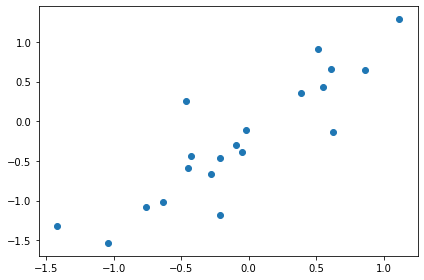

In [3]:
fig, axes = plt.subplots()

axes.scatter(x1,y)

fig.tight_layout()

In [4]:
np.corrcoef(x1,y)

array([[1.        , 0.88131339],
       [0.88131339, 1.        ]])

## Regressão Univariada utilizando a matriz pseudo-inversa

$$ \mathbf{w = (X^tX)^{-1}X^ty} $$

#### Adicionando vetor unitário ao dataset

In [5]:
X = np.stack((np.ones(len(x1)),x1),axis=0).T
X

array([[ 1.        , -0.0222012 ],
       [ 1.        , -1.41921958],
       [ 1.        , -0.75680402],
       [ 1.        , -0.27853212],
       [ 1.        ,  0.61110045],
       [ 1.        ,  0.8607471 ],
       [ 1.        , -0.44724898],
       [ 1.        , -1.04267479],
       [ 1.        , -0.21546986],
       [ 1.        ,  0.62539277],
       [ 1.        , -0.04688071],
       [ 1.        ,  0.38904723],
       [ 1.        , -0.63205713],
       [ 1.        , -0.21181163],
       [ 1.        ,  0.54816598],
       [ 1.        , -0.46159211],
       [ 1.        , -0.09044866],
       [ 1.        , -0.42896418],
       [ 1.        ,  0.51522055],
       [ 1.        ,  1.11392956]])

In [6]:
coef = fit_linear_regression(X,y)
coef

array([-0.16040087,  1.05659673])

In [7]:
coef

array([-0.16040087,  1.05659673])

In [8]:
y_predict = predict_linear_regression(coef,X)
y_predict

array([-0.18385859, -1.65994365, -0.96003753, -0.454697  ,  0.48528587,
        0.7490617 , -0.63296268, -1.26208765, -0.38806563,  0.50038708,
       -0.20993488,  0.25066516, -0.82823037, -0.38420035,  0.41878951,
       -0.64811759, -0.25596862, -0.61364302,  0.38397948,  1.01657347])

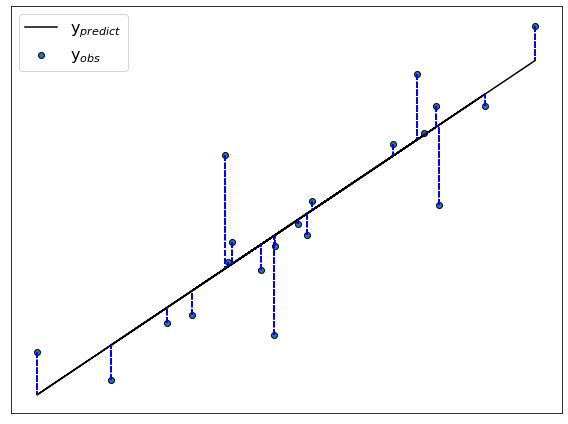

In [9]:
fig, axes = plt.subplots(figsize=(8,6))

axes.scatter(x1,y,edgecolor='black',label='y$_{obs}$')
axes.plot(x1,y_predict,color='black',label='y$_{predict}$')
axes.legend(fontsize=16)

for i,j,z in zip(x1,y,y_predict):
    axes.plot([x1,x1],[y,y_predict],color='blue',ls='--')

axes.set_xticks([])
axes.set_yticks([])

fig.tight_layout()

#fig.savefig('MMQ_ex1.png',dpi=300)

#### Estimando erro entre o treino e o predito

In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
mean_squared_error(y,y_predict)

0.13186347442338295

In [12]:
np.matmul(X.T,X).shape[0]

2

### Adicionando o parâmetro de regularização alpha

$$ \mathbf{w = (X^tX} -\alpha \mathbf{I )^{-1}X^ty} $$

In [13]:
coef_ridge = fit_linear_regression_ridge(X,y,alpha=1)

In [14]:
y_pred_ridge = predict_linear_regression(coef_ridge,X)

In [15]:
mean_squared_error(y,y_pred_ridge)

0.1372133498784148

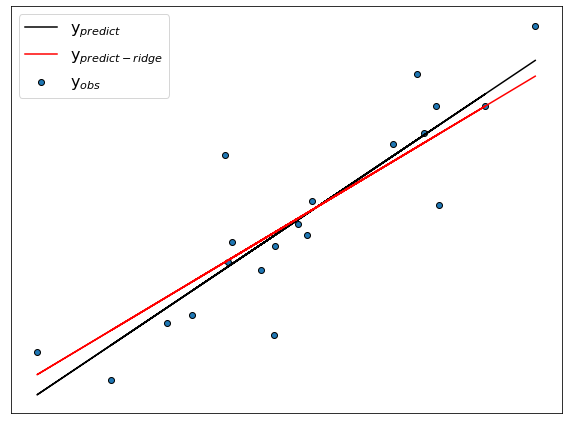

In [16]:
fig, axes = plt.subplots(figsize=(8,6))

axes.scatter(x1,y,edgecolor='black',label='y$_{obs}$')
axes.plot(x1,y_predict,color='black',label='y$_{predict}$')
axes.plot(x1,y_pred_ridge,color='red',label='y$_{predict-ridge}$')
axes.legend(fontsize=16)

#for i,j,z in zip(x1,y,y_predict):
#    axes.plot([x1,x1],[y,y_predict],color='blue',ls='--')

axes.set_xticks([])
axes.set_yticks([])

fig.tight_layout()

#fig.savefig('MMQ_ex1.png',dpi=300)